---
**License**

 Planck_Clash_Test

 Fri Jan 27 15:39:00 2023\
 Copyright  2023\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \
 Mariana Penna-Lima     <pennalima@gmail.com> 

---
---

 Planck_Clash_Test\
 Copyright (C) 2023 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Mariana Penna-Lima <pennalima@gmail.com>.

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

import pyccl as ccl

import sys
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
Ncm.cfg_init ()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

In [3]:
#Cosmological constants
Omega_c = 0.262 
Omega_b = 0.049 
Omega_k = 0.0 
H0      = 67.66  
Tcmb0   = 2.7255 
A_s     = 2.1e-9 
sigma8  = 0.8277 
n_s     = 0.96 
Neff    = 0.0 
w0      = -1.0 
wa      = 0.0

Tinker_lin_interp = True

In [4]:
# NumCosmo Cosmology

#Cosmology object
cosmo = Nc.HICosmo.new_from_name (Nc.HICosmo, "NcHICosmoDECpl{'massnu-length':<0>}")
cosmo.omega_x2omega_k ()
cosmo.param_set_by_name ("H0",        H0)
cosmo.param_set_by_name ("Omegak",    Omega_k)
cosmo.param_set_by_name ("w0",        w0)
cosmo.param_set_by_name ("w1",        wa)
cosmo.param_set_by_name ("Omegab",    Omega_b)
cosmo.param_set_by_name ("Omegac",    Omega_c)
cosmo.param_set_by_name ("Tgamma0",   Tcmb0)

#Homogeneous and isotropic object
hiprim = Nc.HIPrimPowerLaw.new ()
hiprim.param_set_by_name ("ln10e10ASA", math.log (1.0e10 * A_s))
hiprim.param_set_by_name ("n_SA",       n_s)

cosmo.add_submodel (hiprim)

#Distance
dist = Nc.Distance.new (3.0)
dist.prepare (cosmo)

#Transfer function
tf = Nc.TransferFunc.new_from_name ("NcTransferFuncEH")

psml = Nc.PowspecMLTransfer.new (tf)
psml.require_kmin (1.0e-3)
psml.require_kmax (1.0e3)

#Power spectrum
psf = Ncm.PowspecFilter.new (psml, Ncm.PowspecFilterType.TOPHAT)
psf.set_best_lnr0 ()

In [5]:
#Mass function

mulf = Nc.MultiplicityFuncTinker.new ()
mulf.set_linear_interp (Tinker_lin_interp)
mulf.set_mdef (Nc.MultiplicityFuncMassDef.MEAN)
mulf.set_Delta (500.0)

mf = Nc.HaloMassFunction.new (dist, psf, mulf)

[1.3838965267367376e-87, 1.3838965267367376e-87, 1.3838965267367376e-87, 1.3838965267367376e-87, 1.3838965267367376e-87, 1.3838965267367376e-87]


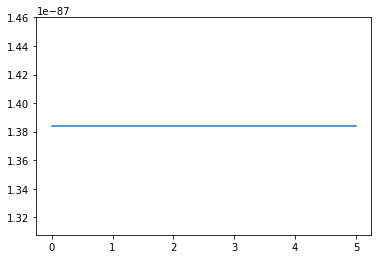

In [6]:
clusterm = Nc.ClusterMass.new_from_name ("NcClusterMassPlCL{'M0':<5.7e14>}")

clusterm.param_set_by_name ('Asz', 1.00)
clusterm.param_set_by_name ('Bsz', 0.25)
clusterm.param_set_by_name ('sigma_sz', 0.12)
clusterm.param_set_by_name ('Al', 1.00)
clusterm.param_set_by_name ('Bl', 0.0)
clusterm.param_set_by_name ('sigma_l', 0.27)
clusterm.param_set_by_name ('cor', 0.0)

ln_true_mass = np.log(5e14)
lnm_sz = np.log(np.array([5e1, 2.1e14, 3.8e14, 3.2e14, 2.7e14, 2.4e14]))
lnm_l = np.log(np.array([3.6e1, 3.0e14, 3.1e14, 5.8e14, 8.2e14, 3.7e14]))

plcl_pdf = [clusterm.plcl_pdf_only_lognormal(ln_true_mass, lnmsz, lnml) for lnmsz, lnml in zip(lnm_sz,lnm_l) ]
print(plcl_pdf)
plt.plot(plcl_pdf)